# Analysis on Airbnb listing data for the city of Amsterdam

### Import libraries

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Load dataset

In [3]:
data = pd.read_csv('http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-06-05/visualisations/listings.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


In [4]:
data.shape

(6173, 18)

dataset has 6173 records and 18 columns

### Check for missing values

In [5]:
data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6173
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        590
reviews_per_month                  590
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            415
dtype: int64

In [6]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6173 non-null   int64  
 1   name                            6173 non-null   object 
 2   host_id                         6173 non-null   int64  
 3   host_name                       6173 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6173 non-null   object 
 6   latitude                        6173 non-null   float64
 7   longitude                       6173 non-null   float64
 8   room_type                       6173 non-null   object 
 9   price                           6173 non-null   int64  
 10  minimum_nights                  6173 non-null   int64  
 11  number_of_reviews               6173 non-null   int64  
 12  last_review                     55


### Data pre-processing

#### Check for duplicates and remove duplicates

In [8]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

#### Drop unnecessary columns

In [9]:
data.drop(['id','name','host_name','neighbourhood_group'], axis=1, inplace=True)
data.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,122619127,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,269425139,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,76806621,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,238083700,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,360838688,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


In [10]:
data['last_review']= pd.to_datetime(data.last_review)

In [11]:
data.last_review.fillna(method="ffill", inplace=True)

In [12]:
data["reviews_per_month"] = data["reviews_per_month"].fillna(data["reviews_per_month"].mean())

In [13]:
def categories(row):  
    if pd.isna(row['license']):
        return 'No license'
    return 'licensed'

data['license_availability'] = data.apply(lambda row: categories(row), axis=1)

In [14]:
data.drop(['license'], axis=1, inplace=True)

In [15]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.173000e+03,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000
mean,9.147516e+07,52.366103,4.892384,198.019601,4.497813,50.760408,1.211241,2.043253,87.994168,10.255467
std,1.208208e+08,0.021921,0.041960,140.546979,31.221594,94.366924,2.139680,2.833791,112.572382,29.646087
min,3.159000e+03,52.268010,4.742430,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.072052e+06,52.355350,4.867720,115.000000,2.000000,4.000000,0.290000,1.000000,0.000000,0.000000
50%,3.136565e+07,52.366090,4.888583,160.000000,2.000000,17.000000,0.660000,1.000000,23.000000,3.000000
75%,1.303748e+08,52.377210,4.911040,240.000000,3.000000,48.000000,1.240000,2.000000,158.000000,10.000000
max,4.621962e+08,52.442340,5.074204,2500.000000,1001.000000,1110.000000,94.880000,20.000000,365.000000,1088.000000


In [16]:
data['neighbourhood'].unique()

array(['IJburg - Zeeburgereiland', 'Noord-Oost', 'Noord-West',
       'Gaasperdam - Driemond', 'Watergraafsmeer', 'Bijlmer-Centrum',
       'Geuzenveld - Slotermeer', 'Westerpark', 'Buitenveldert - Zuidas',
       'Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'Zuid', 'Oud-Oost', 'De Pijp - Rivierenbuurt',
       'Slotervaart', 'De Baarsjes - Oud-West', 'Bos en Lommer',
       'Oud-Noord', 'De Aker - Nieuw Sloten', 'Osdorp', 'Bijlmer-Oost'],
      dtype=object)

In [17]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [18]:
data['license_availability'].unique()

array(['licensed', 'No license'], dtype=object)

In [19]:
data.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license_availability              0
dtype: int64

In [20]:
data.shape

(6173, 14)

### Data Visualization


#### Room types

C:\Users\sheronk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


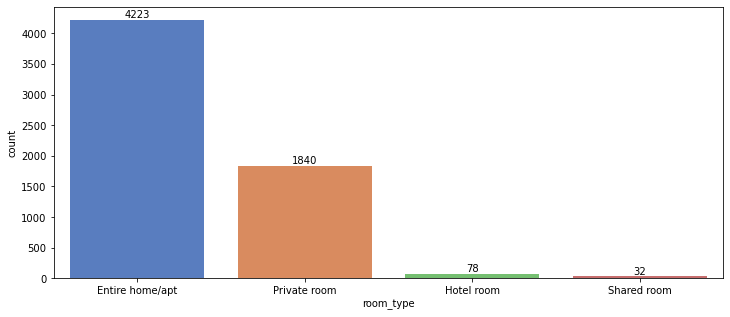

In [21]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(data.room_type,order = data['room_type'].value_counts().index,palette="muted")
abs_values = data['room_type'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

The above plot represents the count of different room types across the given dataset. From the plot, it is depicted that maximum number of type of room is Entire home/apt and least count is for Shared room. Which means majority of them are preferred to choose Entire home/apt over a hotel room or a shared room.

#### Price distribution of entire home/apt

C:\Users\sheronk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


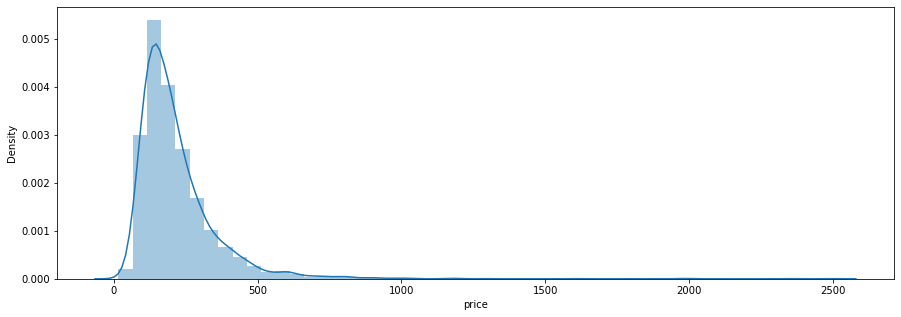

In [22]:
df = data[data.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df)
plt.show()

The price distribution of Airbnb in averages around 100-300 euro per night depending upon the room type is Entire home/apt.

#### Price distribution of private rooms 

C:\Users\sheronk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


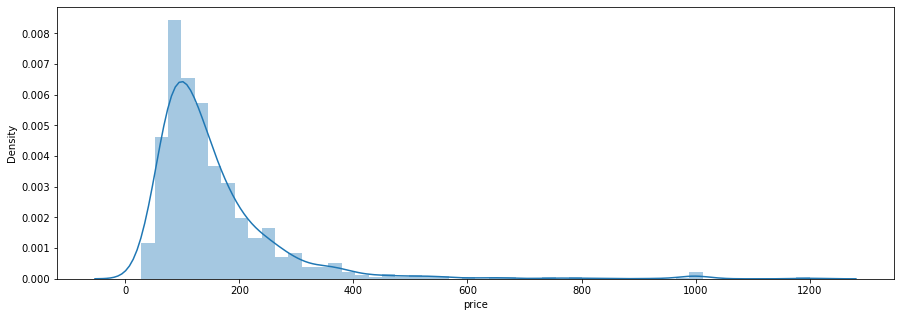

In [23]:
df = data[data.room_type=='Private room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df)
plt.show()

The price distribution of Airbnb in averages around 100-200 euro per night depending upon the room type is Private room.

#### Most populat Neighbourhood

<BarContainer object of 10 artists>

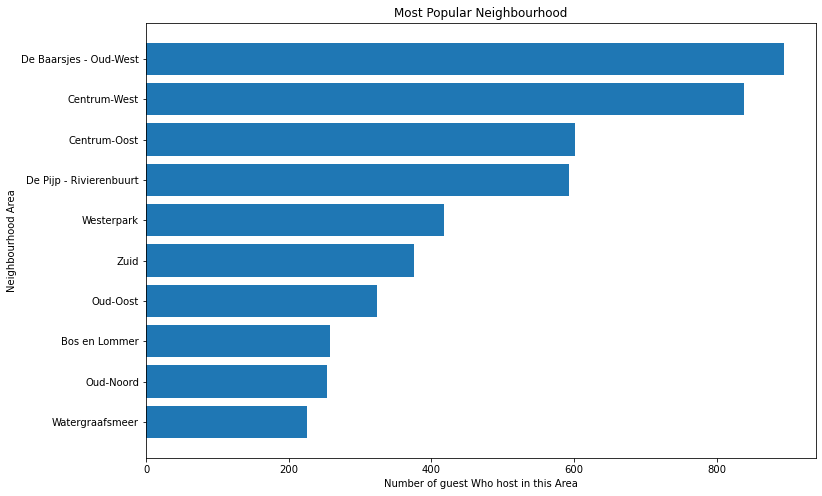

In [24]:
df2 = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df2.index)
y = list(df2.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

The bar chart shows the top 10 neighbourhood areas and it's clear that De Baarsjes-Oud_West and Centrum-West top the list.

#### Scatter plot 

C:\Users\sheronk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


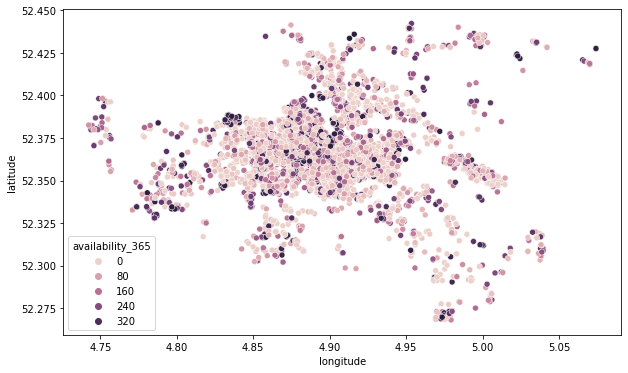

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.availability_365)
plt.ioff()

The plot describes that majority of the places are not available through out the year and there is a tendency that properties which which are available through out the year are scattered around the same neighbourhood as seperate clusters.

#### Top 10 hosts

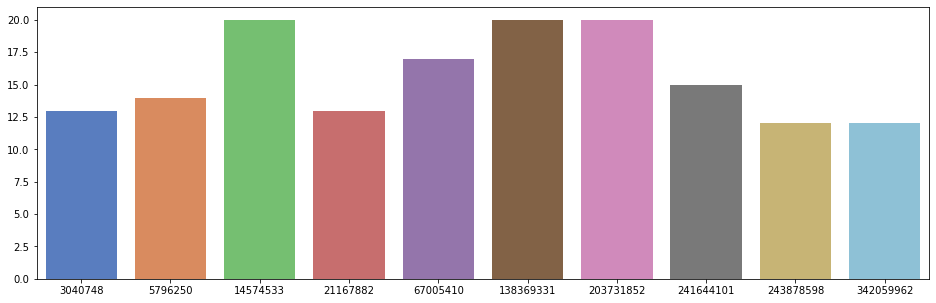

In [27]:
df3 = data.host_id.value_counts()[:10]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df3.index,y=df3.values,palette="muted")
plt.show()

This is the list of top 10 most popular host in the given neighbourhood groups. Maximum number of people love to stay at their place. The reason behind their popularity may depend upon the price, neighbourhood, cleanliness and many more.

#### Histograms


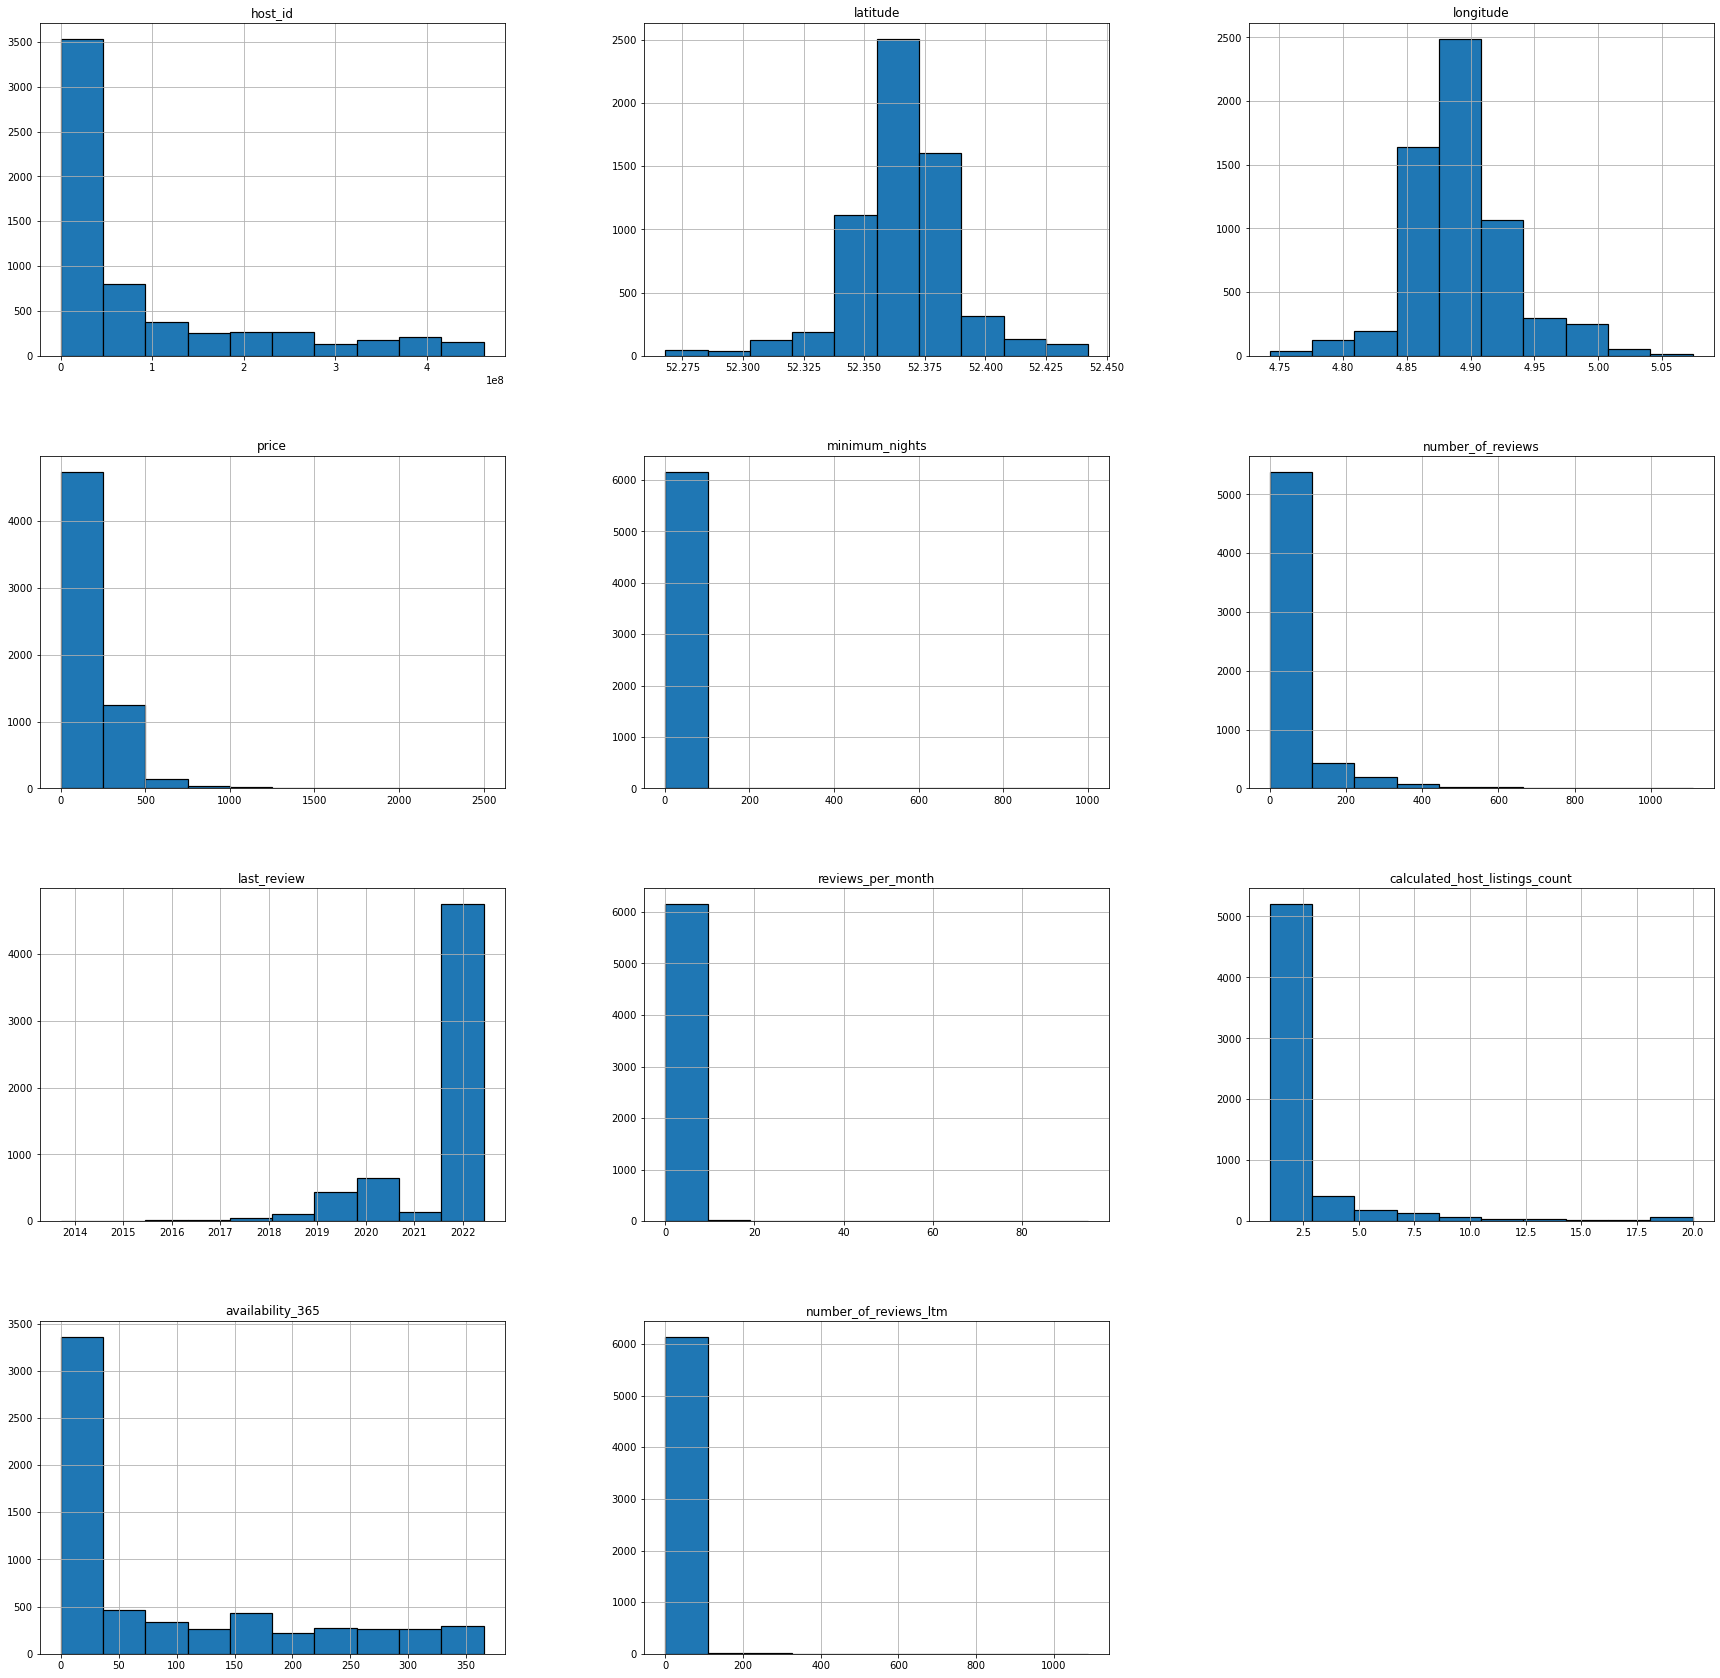

In [28]:
data.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

Longitude and latitude variables are normally distributed. Last review, calculated host listing count and availability 365 variables are skewed.

#### Avg, Max and Min price per night

In [29]:
print(f"Average of price per night : ${data.price.mean():.2f}")
print(f"Maximum price per night : ${data.price.max()}")
print(f"Minimum price per night : ${data.price.min()}")

Average of price per night : $198.02
Maximum price per night : $2500
Minimum price per night : $0


#### Correlation Matrix

<AxesSubplot:>

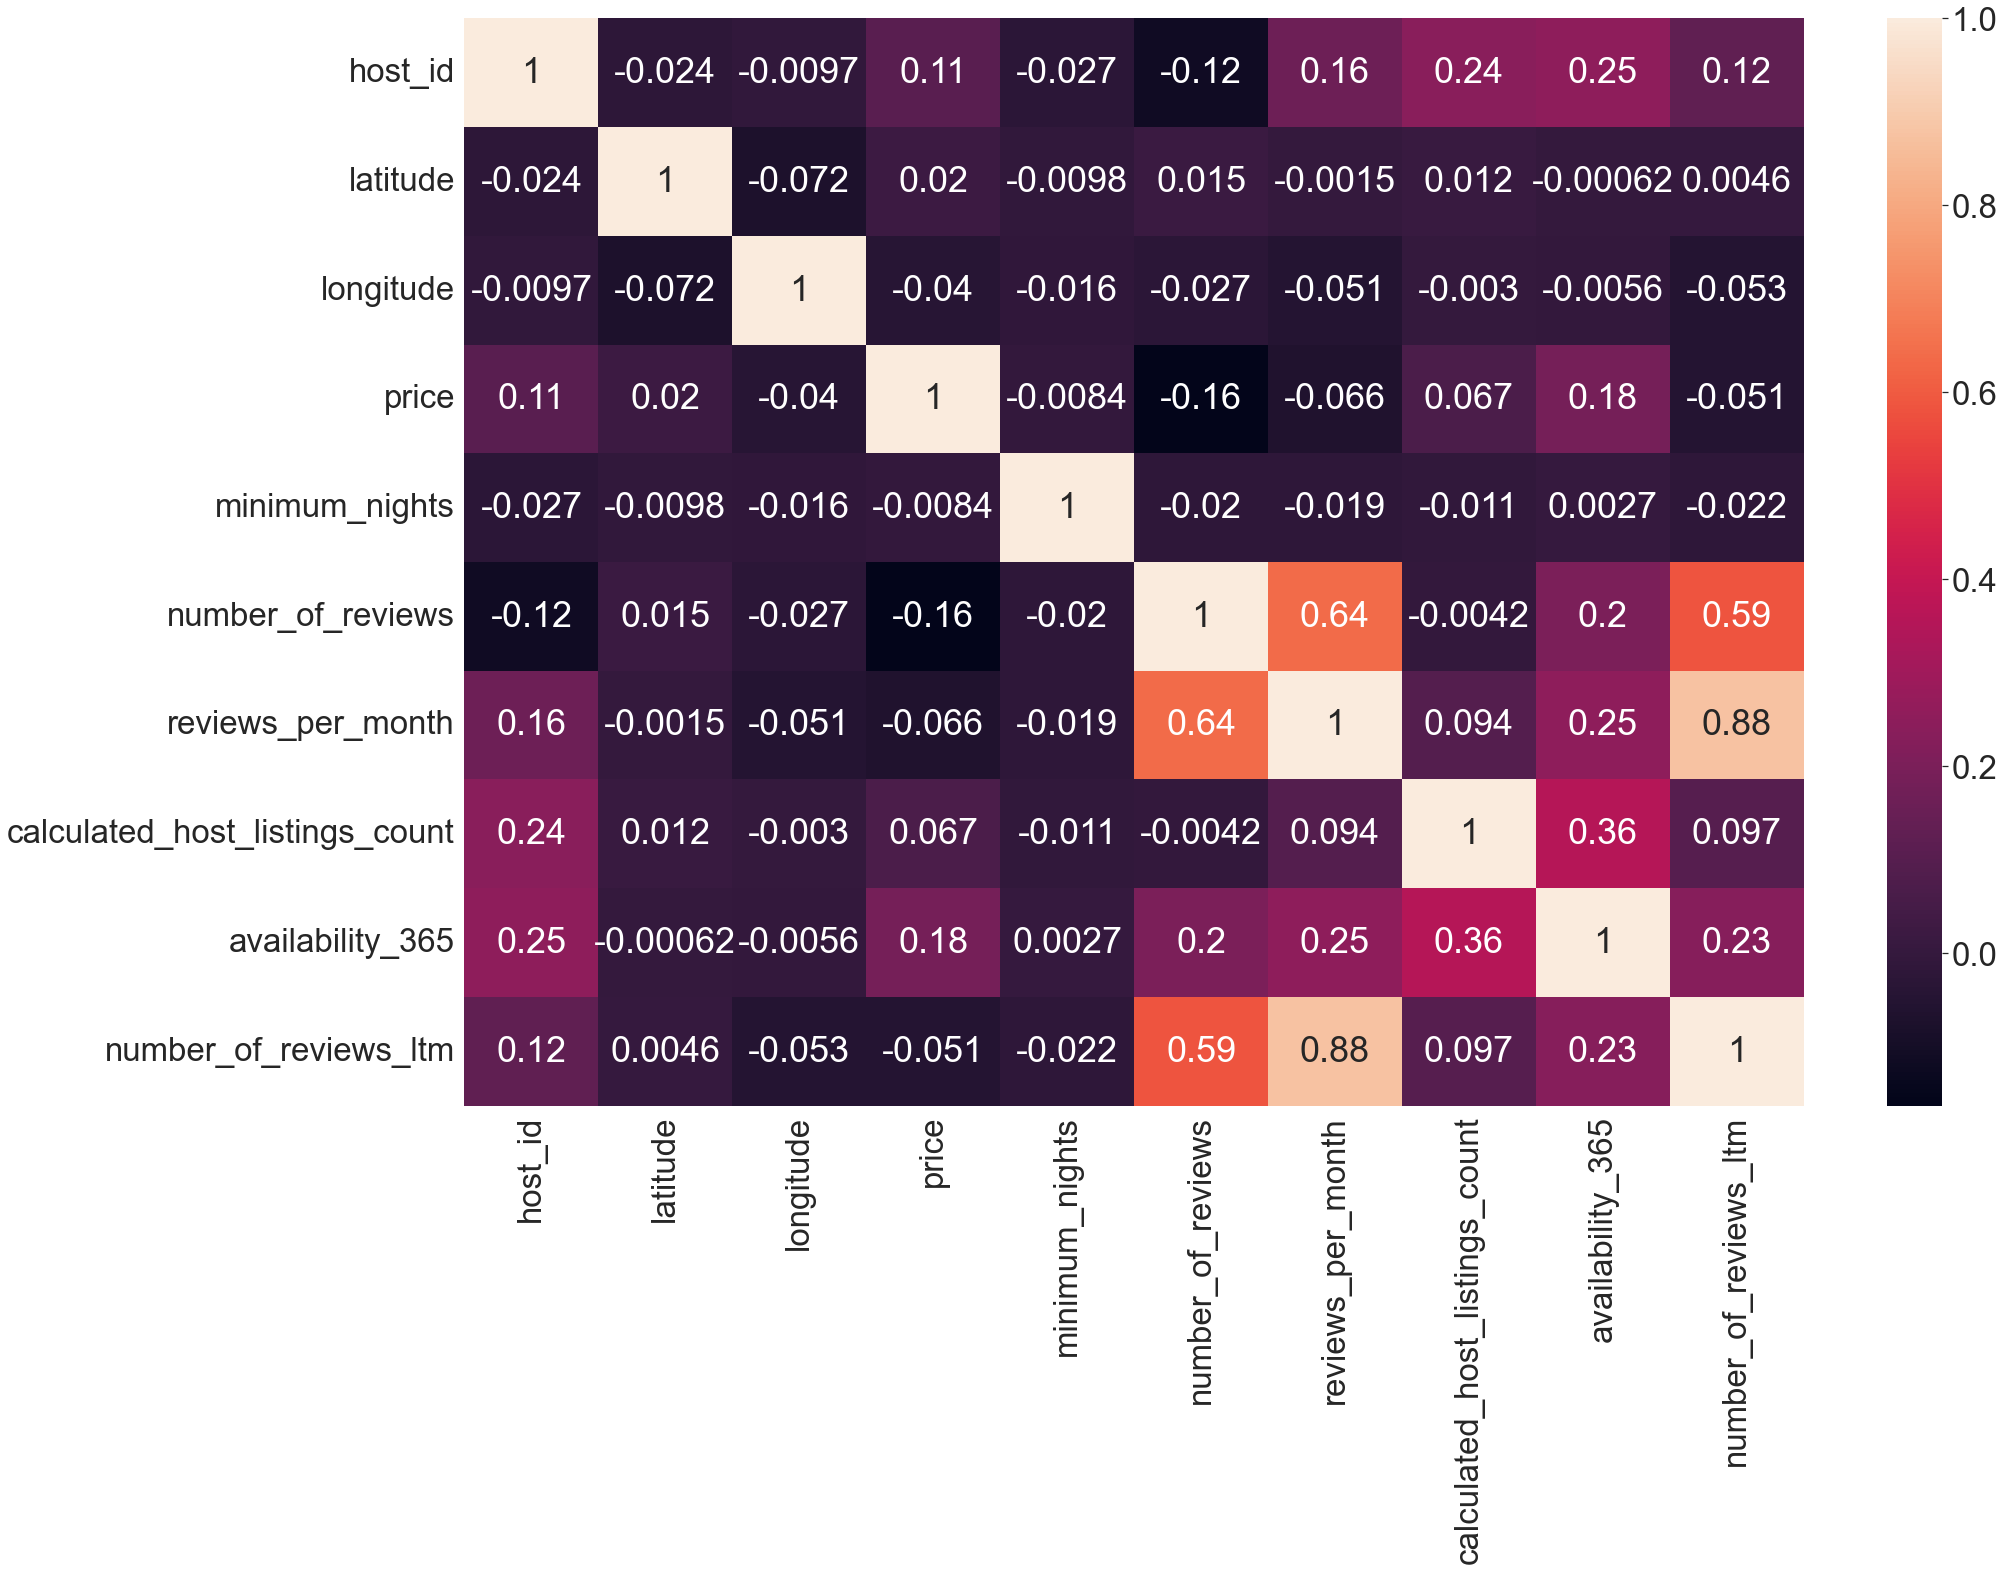

In [30]:
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True)

reviews per month and number of reviews show a relatively higher correlation.
reviews per month and number of reviews ltm are highly correalted.

#### Correlation with Price

<AxesSubplot:title={'center':'Correlation with Price'}>

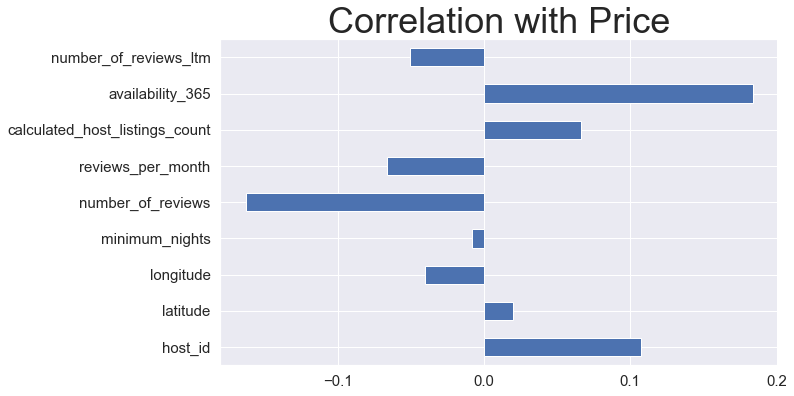

In [31]:
df4 = data.copy()
df4.drop('price', axis=1).corrwith(df4.price).plot.barh(figsize=(10, 6), 
                                                        title='Correlation with Price',
                                                        fontsize=15, grid=True)

Availbility_365 column shows relatively higher correlation than other given variables. (18%)

#### Correlatin with number of reviews

<AxesSubplot:title={'center':'Correlation with number of reviews'}>

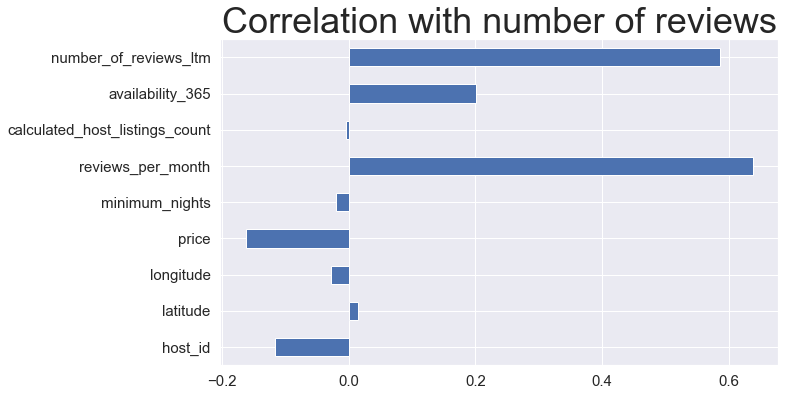

In [32]:
df5 = data.copy()
df5.drop('number_of_reviews', axis=1).corrwith(df5.number_of_reviews).plot.barh(figsize=(10, 6), 
                                                        title='Correlation with number of reviews',
                                                        fontsize=15, grid=True)

Reviews per month and number of reviews ltm show the highest correlation against number of reviews. As per the given chart, price has less to no impact over number of reviews.

#### Word cloud

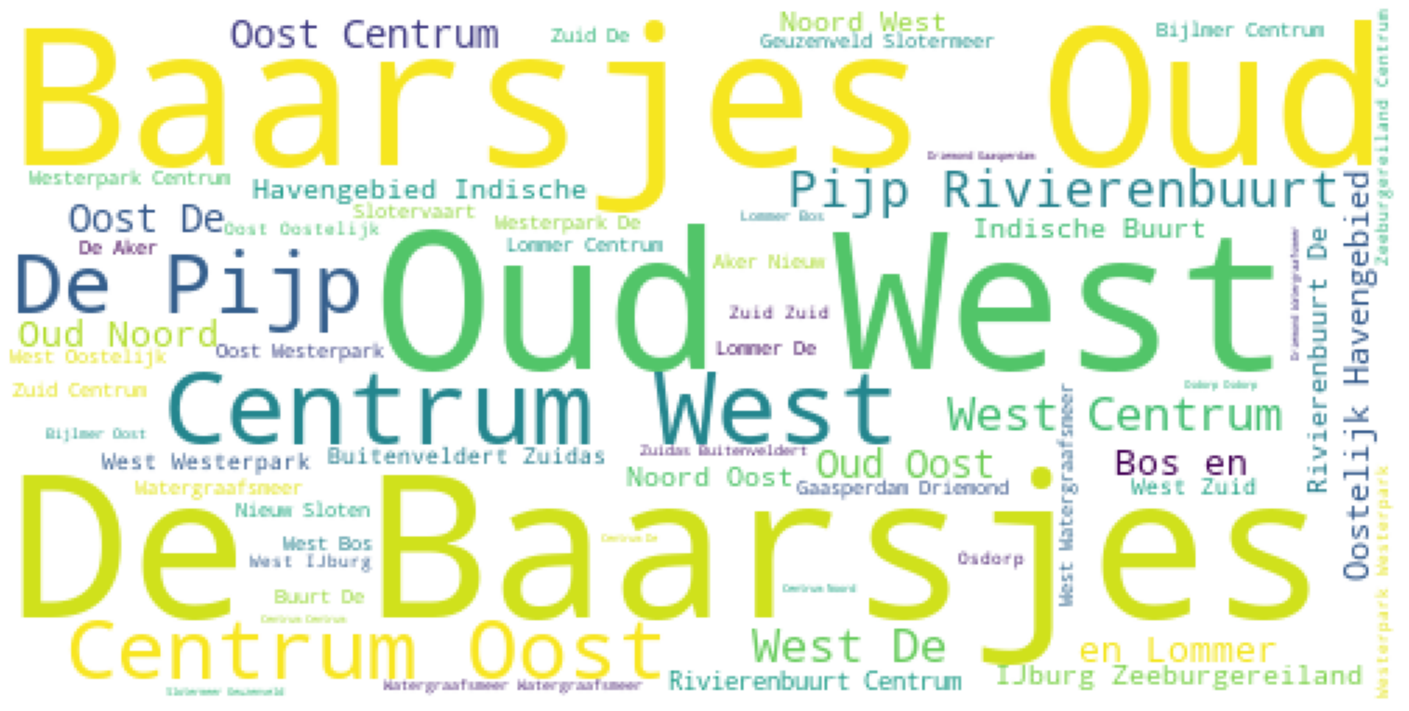

In [33]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=500,
                          height=250
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

The word cloud helps to depic the most popular neighbourhood. The larger the font it shows the most frequently accessed neighbourhood. For eg De Baarsjes, Oud West, Baarsjes Oud are the most frequentlt visited neighbourhood.

#### Regression analysis

In [43]:
df6=data.copy()
df6.drop(['host_id','latitude','longitude','neighbourhood','reviews_per_month','last_review'], axis=1, inplace=True)


In [45]:
df6.head()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license_availability
0,Private room,88,2,78,1,66,11,licensed
1,Entire home/apt,105,3,95,1,243,36,No license
2,Entire home/apt,152,2,82,1,3,26,No license
3,Entire home/apt,87,2,39,3,290,4,No license
4,Private room,160,2,15,1,152,12,No license


In [47]:
#Encode the input Variables
def Encode(df6):
    for column in df6.columns[df6.columns.isin(['room_type', 'license_availability'])]:
        df6[column] = df6[column].factorize()[0]
    return df6

df6_en = Encode(df6.copy())

In [48]:
df6_en.head()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license_availability
0,0,88,2,78,1,66,11,0
1,1,105,3,95,1,243,36,1
2,1,152,2,82,1,3,26,1
3,1,87,2,39,3,290,4,1
4,0,160,2,15,1,152,12,1


In [49]:
df6_en.shape

(6173, 8)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Defining the independent variables and dependent variables
x = df6_en.iloc[:,[0,2,3,4,5,6,7]]
y = df6_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)



In [55]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.11649408088322499

Dependent variable is Price, Independent variables are room type,minimum nights,number of reviews, calculated host listings, availability 365, number of reviews ltm, license avialbility. The data size is too small to run a regression model , somehow I have considered 20% of the data set as the training dataset and R squared is 11.6% which means the propotion of variance in the dependent variable that can be explained by the independent variable is relatively lesser.

### Conclusion

It is evident that majority of the room type which is accessed by people are Entire Home/apt and private room over hotel rooms and shared rooms. Price range of entire home/apt varies around 100-300 euro per night and private room varies around 50-150 euro per night. Most popular neighbourhood can be listed as De Baarsjes -Oud West and Centrum- West. The numbers go hand in hand for the given neighbourhood when compared to rest of the list. When comparing availability-365 variable over lattitude and longitude it is evident that majority of the prpoperties were not avilable through out the year. Overall, the dataset is too small to run a regression model hence the Rsquared value came down to 11%
